In [2]:
# 120 年 奥运会 数据

import pandas as pd
import seaborn as sns

In [30]:

df = pd.read_csv('../dataset/olympic/athlete_events.csv')

# 显示数据集大小
df.shape

(271116, 15)

In [4]:
# 显示 列名字
list(df)

['ID',
 'Name',
 'Sex',
 'Age',
 'Height',
 'Weight',
 'Team',
 'NOC',
 'Games',
 'Year',
 'Season',
 'City',
 'Sport',
 'Event',
 'Medal']

In [5]:
# 数据有 15 列，但是完整性是怎样的？
# 完整性是指非空值

# count() 只算非空记录
# pandas.count Count non-NA cells for each column or row.

def NaN_percent(df, column_name):
    row_count = df[column_name].shape[0]
    empty_values = row_count - df[column_name].count()
    return (100.0*empty_values)/row_count

for i in list(df):
    print(i +': ' + str(NaN_percent(df,i))+'%')  


ID: 0.0%
Name: 0.0%
Sex: 0.0%
Age: 3.49444518213606%
Height: 22.193821095029435%
Weight: 23.19118015904631%
Team: 0.0%
NOC: 0.0%
Games: 0.0%
Year: 0.0%
Season: 0.0%
City: 0.0%
Sport: 0.0%
Event: 0.0%
Medal: 85.3262072323286%


In [6]:
# 我们问的第一个问题是，自 1900 年以来，有多少不同的人获得过奖牌？
total_rows = df.shape[0]
unique_athletes = len(df.Name.unique())
medal_winners = len(df[df.Medal.fillna('None')!='None'].Name.unique())

"{0} {1} {2}".format(total_rows, unique_athletes, medal_winners)



'271116 134732 28202'

In [7]:
# 那么在这 120 年里运动员们到底赢得了多少奖牌呢？

# 查看奖牌分布
print(df[df.Medal.fillna('None')!='None'].Medal.value_counts())
# 总共多少奖牌
df[df.Medal.fillna('None')!='None'].shape[0]


Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64


39783

In [12]:
# 那么按照国家来进行分配呢？

team_medal_count = df.groupby(['Team','Medal']).Medal.agg('count')

# 按照数量进行排列
team_medal_count = team_medal_count.reset_index(name='count').sort_values(['count'], ascending=False)

team_medal_count.head(10) 


# def get_country_stats(country):
#     return team_medal_count[team_medal_count.Team==country]
# # get_country_stats('some_country') 获得对应国家的奖牌


,Team,Medal,count
726,United States,Gold,2474
727,United States,Silver,1512
725,United States,Bronze,1233
627,Soviet Union,Gold,1058
628,Soviet Union,Silver,716
263,Germany,Gold,679
262,Germany,Bronze,678
626,Soviet Union,Bronze,677
264,Germany,Silver,627
278,Great Britain,Silver,582


In [13]:
# 我想到的另一件有趣的事是，从这整个世纪以来，女性在奥运会上的表现如何？

unique_women = len(df[df.Sex=='F'].Name.unique())
unique_men = len(df[df.Sex=='M'].Name.unique())
women_medals = df[df.Sex=='F'].Medal.count()
men_medals = df[df.Sex=='M'].Medal.count()

print("{} {} {} {} ".format(unique_women, unique_men, women_medals, men_medals ))

df[df.Sex=='F'].Year.min()


33808 100979 11253 28530 


1900

(<matplotlib.axes._subplots.AxesSubplot at 0x11a99b630>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11a99b630>)

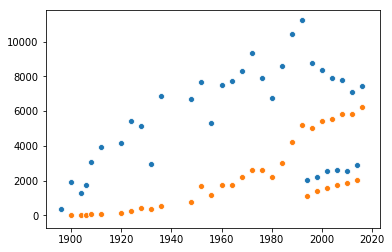

In [14]:
f_year_count = df[df.Sex=='F'].groupby('Year').agg('count').Name
m_year_count = df[df.Sex=='M'].groupby('Year').agg('count').Name

(sns.scatterplot(data= m_year_count),
 sns.scatterplot(data =f_year_count))


In [ ]:
df

b = df.groupby(['Team','Medal']).Medal.agg('count')

In [22]:
df.groupby(['Team','Medal']).Medal.agg('count')

Team                          Medal 
A North American Team         Bronze      4
Afghanistan                   Bronze      2
Algeria                       Bronze      8
                              Gold        5
                              Silver      4
Ali-Baba II                   Bronze      5
Amateur Athletic Association  Gold        5
Amstel Amsterdam              Bronze      4
Ancora                        Gold        4
Angelita                      Gold       12
Antwerpia V                   Bronze      5
Aphrodite                     Bronze      3
Argentina                     Bronze     91
                              Gold       91
                              Silver     84
Argonaut Rowing Club          Bronze      6
Armenia                       Bronze      9
                              Gold        2
                              Silver      5
Aschenbrodel                  Gold        4
                              Silver      4
Atalanta Boat Club-1          Gold     

In [23]:
import pandas as pd

ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
         'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)

In [24]:
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [25]:
print(df.groupby('Team').groups)

{'Devils': Int64Index([2, 3], dtype='int64'), 'Kings': Int64Index([4, 6, 7], dtype='int64'), 'Riders': Int64Index([0, 1, 8, 11], dtype='int64'), 'Royals': Int64Index([9, 10], dtype='int64'), 'kings': Int64Index([5], dtype='int64')}


In [27]:
grouped = df.groupby('Team')
score = lambda x: (x - x.mean()) / x.std()*10
print(grouped.Points.transform(score))

0     12.843272
1      3.020286
2      7.071068
3     -7.071068
4     -8.608621
5           NaN
6     -2.360428
7     10.969049
8     -7.705963
9     -7.071068
10     7.071068
11    -8.157595
Name: Points, dtype: float64


In [31]:
df = pd.read_csv('../dataset/olympic/athlete_events.csv')

df_filtered = df[['Name','Sport','Height','Weight','Sex']]

# groupby Name，并且只取第一个，并且打平
df_grouped = df_filtered.dropna().groupby('Name').first().reset_index()
df_grouped.shape

(99041, 5)

In [32]:
len(df_grouped.Sport.unique())
#55

55

In [33]:
# one hor encoder 

# first is all zero, so can be dropped. 
df_one_hot_encode = pd.get_dummies(df_grouped.Sport, prefix='sport', drop_first=True)

In [34]:
df_one_hot_encode

,sport_Archery,sport_Art Competitions,sport_Athletics,sport_Badminton,sport_Baseball,sport_Basketball,sport_Beach Volleyball,sport_Biathlon,sport_Bobsleigh,sport_Boxing,...,sport_Table Tennis,sport_Taekwondo,sport_Tennis,sport_Trampolining,sport_Triathlon,sport_Tug-Of-War,sport_Volleyball,sport_Water Polo,sport_Weightlifting,sport_Wrestling
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df_one_hot_encode['Height'] = df_grouped.Height
df_one_hot_encode['Weight'] = df_grouped.Weight
df_one_hot_encode['Sex'] = df_grouped.Sex

df_one_hot_encode.loc[df_one_hot_encode.Sex.isin(['M']),'sex']= 0
df_one_hot_encode.loc[df_one_hot_encode.Sex.isin(['F']),'sex']= 1
df_one_hot_encode = df_one_hot_encode.drop(columns='Sex')

In [ ]:
NUM_TRAIN_DATA = 6500

# further processing 
train_data = df_one_hot_encode[:NUM_TRAIN_DATA]
#train_data_female = df_one_hot_encode[:NUM_TRAIN_DATA][df_one_hot_encode.sex==0]
test_data = df_one_hot_encode[NUM_TRAIN_DATA:]

# Preparing Dataset for consumption.

model_input = train_data.iloc[:, -3:-1].values
labels = np.asarray([[i[0], 1 - i[0]] for i in train_data.iloc[:, -1:].values])
print(model_input.shape, labels.shape)

validation_features = test_data.iloc[:, -3:-1].values
validation_labels = [[i[0], 1 - i[0]] for i in test_data.iloc[:, -1:].values]